In [1]:
# General imports and widgets
import os
if os.getcwd().split('/')[-1] != 'deepARTransit':
    os.chdir('../..')
import sys
import warnings
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pixlc import plotting
import ipywidgets as widgets
from ipywidgets import interactive
from deepartransit.utils.transit import LinearTransit, LLDTransit, get_transit_model, QLDTransit
from pixlc.plotting import plot_mozaic

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 15
warnings.simplefilter("ignore")

# Project dir selection widget

project_button = widgets.Dropdown(
    options=[os.path.join('.'), # local git repo
             os.path.join('/','Users','Mario','mount_test','deepARTransit') # cobweb         
],
    #value=experiment_folder,
    # rows=10,
    description='\t\t',
    disabled=False
)

In [2]:
#project directory for loading the data
project_button

Dropdown(description='\t\t', options=('.', '/Users/Mario/mount_test/deepARTransit'), value='.')

In [6]:
# Experiment selection widget
project_dir = project_button.value

experiment_widget = widgets.Dropdown(
    options=sorted(list({r.split('experiments')[1][1:] for r,d,f in os.walk(os.path.join(project_dir, 'deepartransit','experiments')) if 'output' in d and 'summary' in d})),
    #value=experiment_folder,
    # rows=10,
    description='\t\t',
    disabled=False
)



In [4]:
# Experiment text box widget
experiment_widget = widgets.Textarea(
    #options=sorted(list({r.split('experiments')[1][1:] for r,d,f in os.walk(os.path.join(project_dir, 'deepartransit','experiments')) if 'output' in d and 'summary' in d})),
    value='cobweb/',
    # rows=10,
    description='\t\t',
    disabled=False
)

In [7]:
#Select an experime
experiment_widget

Dropdown(description='\t\t', options=('cobweb/agol_all_transits', 'cobweb/agol_all_transits_4cent', 'cobweb/ag…

In [23]:
# Load data
from deepartransit.utils.config import get_config_file, process_config
from deepartransit.data_handling import data_generator

experiment_folder = experiment_widget.value
project_dir = project_button.value
#experiment_folder = 'cob£web/agol_rlc/22807296/'
experiment_dir = os.path.join(project_dir, 'deepartransit', 'experiments', experiment_folder)
print(experiment_dir)

config_file = get_config_file(experiment_dir)
config = process_config(config_file)
data = data_generator.DataGenerator(config)
config = data.update_config()
width = int(np.sqrt(data.Z.shape[0]))

transitModel = get_transit_model(config['transit_model'])
#os.listdir(os.path.join(project_dir, config.output_dir))

./deepartransit/experiments/cobweb/agol_all_transits_4cent_covr2
add_noise defaulted to False
defaulting adapt range to True
defaulting start adapt frac to 0.5
loading data from deepartransit/data/agol_transits_nobacksub/rlc_agol_transits_r2.npy
(6, 690, 1) (6, 690, 4)
time_path parameter not found in config. Default to 0,1,2....T-1
Inferring num_features, num_cov, num_ts from the data.
selecting linear transit model


In [24]:
os.listdir(os.path.join(experiment_dir, 'output'))

['scales_array_550.npy',
 'loc_array_5750.npy',
 'loc_array_1250.npy',
 'loc_array_4300.npy',
 'scales_array_4250.npy',
 'loc_array_850.npy',
 'scales_array_5600.npy',
 'scales_array_1300.npy',
 'scales_array_3700.npy',
 'scales_array_2350.npy',
 'loc_array_2200.npy',
 'loc_array_3650.npy',
 'scales_array_800.npy',
 'loc_array_500.npy',
 'scales_array_5950.npy',
 'loc_array_700.npy',
 'loc_array_5800.npy',
 'loc_array_3450.npy',
 'loc_array_2000.npy',
 'scales_array_2150.npy',
 'scales_array_3500.npy',
 'scales_array_5400.npy',
 'scales_array_1100.npy',
 'scales_array_4050.npy',
 'loc_array_4100.npy',
 'loc_array_5550.npy',
 'loc_array_1050.npy',
 'scales_array_750.npy',
 'loc_array_3900.npy',
 'scales_array_3850.npy',
 'loc_array_4500.npy',
 'loc_array_5150.npy',
 'loc_array_1450.npy',
 'scales_array_5000.npy',
 'scales_array_1500.npy',
 'scales_array_4450.npy',
 'scales_array_2800.npy',
 'loc_array_2950.npy',
 'scales_array_350.npy',
 'loc_array_4850.npy',
 'loc_array_1900.npy',
 'sc

In [25]:
# retrieve evaluation steps
loc_dict = {}
pars_dict = {}
scale_dict = {}
for fn in [s for s in os.listdir(os.path.join(project_dir, config.output_dir)) if (s[:3] == 'loc')]:
    step = fn.split('_')[-1].split('.')[0]
    try:
        loc_dict[int(step)] = np.load(os.path.join(project_dir, config.output_dir, fn)).swapaxes(0,1)#.mean(axis=0)
        #pars_dict[int(step)] = np.load(os.path.join(project_dir, config.output_dir, 'trans_pars_{}.npy'.format(step))).swapaxes(0,1)
        scale_dict[int(step)] = np.load(os.path.join(project_dir, config.output_dir, 'scales_array_{}.npy'.format(step))).swapaxes(0,1)#.mean(axis=0)
        #pred_instr = traces_array.mean(axis=(0))
        #length_pred = pred_instr.shape[1]
        #plc_trans = data.Z[:, config.pretrans_length:config.pretrans_length+config.trans_length+1]
    except:
        print(fn)
        break
step_list = sorted([int(k) for k in loc_dict if k!='array'])
print(step_list)

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000]


In [26]:
# Visualize evolution of predictions and fits
pred_range = range(config.pretrans_length, config.pretrans_length+ config.trans_length + 1)
transitModel = LLDTransit
def update(step = step_list[-1], obs = 0, show=True, verbose=False):
    loc_k = np.load(os.path.join(project_dir, config.output_dir, 'loc_array_{}.npy'.format(step))).swapaxes(0,1)
    scales_k = np.load(os.path.join(project_dir, config.output_dir, 'scales_array_{}.npy'.format(step))).swapaxes(0,1)[obs].flatten()
    #print(loc_k.shape)
    #trans_pars = np.load(os.path.join(project_dir, config.output_dir, 'trans_pars_{}.npy'.format(step)))
    #try:
    #    popt = trans_pars[obs]
    #except TypeError:
    #    popt = trans_pars
    #transit = transitModel(data.time_array, popt)
    transit = transitModel(data.time_array)
    transit_component = (data.scaler_Z.inverse_transform(data.Z)[obs]
                         /data.scaler_Z.inverse_transform(loc_k)[obs])
    #print(transit_component.shape, scales_k.shape, data.Z.shape)
    #print(transit.transit_pars)
    transit.fit(transit_component, 
                range_fit=range(data.Z.shape[1]), 
                time_axis=0, 
                #p0=transit.transit_pars,
                sigma=scales_k)
    if verbose:
        print('transit params: {}'.format(transit.trans_pars))
        #print('uncertainties: {}'.format(transit.err))
        
        print('transit duration : {0:0.6f}'.format(transit.duration))
    print('transit params: {}'.format(transit.transit_pars))
    print('transit depth: {0:0.6f} +/- {1:0.6f}'.format(transit.delta, transit.err_delta))
    plt.plot(data.Z[obs].flatten())
    plt.plot()
    p = plt.plot(loc_k[obs])
    plt.fill_between(data.time_array, loc_k[obs,:,0] - scales_k, loc_k[obs,:,0] + scales_k, alpha= 0.3, color=p[0].get_color())
    #plt.plot(pred_range, d[step][:,0,:,0].T, label=step, color='grey', linewidth=0.2, alpha= 0.3)
    #plt.plot(pred_range, d[step][:,0,:,0].mean(0), label=step, color='red', linewidth=1)
    #plt.plot(pred_range, data.scaler_Z.transform(data.scaler_Z.inverse_transform(d[step][:,0,:,0].mean(0)) *
    #                                             transit.flux[pred_range]).flatten(), 
    #         label=step, color='red', linewidth=1, alpha=0.7)
    
    
    plt.title('step {}'.format(step))
    if show:
        plt.show()

    plt.plot(transit_component)
    plt.plot(transit.flux, color='red')
    if show:
        plt.show()
    else:
        plt.clf()
    return np.sqrt(np.diag(transit.pcov))
    
def update_pixels(step = step_list[-1], obs=0):
    loc_k = np.load(os.path.join(project_dir, config.output_dir, 'loc_array_{}.npy'.format(step))).swapaxes(0,1)
    trans_pars = np.load(os.path.join(project_dir, config.output_dir, 'trans_pars_{}.npy'.format(step)))
    transit = transitModel(data.time_array, trans_pars[0])
    print('transit params: {}'.format(trans_pars[0]))
    scales_k = np.load(os.path.join(project_dir, config.output_dir, 'scales_array_{}.npy'.format(step))).swapaxes(0,1)
    print(data.Z[obs].shape, loc_k.shape)
    #grid = plot_mozaic(data.Z[obs].reshape(-1, 1, 2), label='data')
    #plot_mozaic(loc_k[obs].reshape(-1, 2, 1), label='pred', grid=grid)
    #plt.show()
    #plt.plot(data.Z.sum(axis=(0, -1)))
    #plt.plot(loc_k.sum(axis=(0, -1)))
    #plt.show()
    plt.plot(data.scaler_Z.inverse_transform(data.Z).sum((0,-1)))
    #plt.plot(loc_k.sum(axis=(0, -1)))
    plt.plot(data.scaler_Z.inverse_transform(loc_k).sum((0,-1)))
    plt.show()
    plt.plot(data.scaler_Z.inverse_transform(data.Z).sum((0,-1))/
         data.scaler_Z.inverse_transform(loc_k).sum((0,-1)))
    plt.plot(transit.flux, color='red')
    plt.show()

if config.num_features - 1:  # Pixels mode
    interactive_plot = interactive(update_pixels, 
                                   step=(step_list[0], step_list[-1], config.freq_eval),
                                   obs=range(data.Z.shape[0]))
    output = interactive_plot.children[-1]
    output.layout.height = '1550px'
else:
    interactive_plot = interactive(update, 
                                   step=(step_list[0], step_list[-1], config.freq_eval),
                                   obs=range(data.Z.shape[0])
                                  )
    output = interactive_plot.children[-1]
    output.layout.height = '800px'

interactive_plot

interactive(children=(IntSlider(value=6000, description='step', max=6000, min=50, step=50), Dropdown(descripti…

In [17]:
step = -1 #step_list[-1] 
#step = 300//config.freq_eval
power = 1 if config['transit_model'].lower() == 'linear' else 2

yerr = [update(obs=i, show=False, verbose=False)[1] for i in range(data.Z.shape[0])]

pars_array = np.array([pars_dict[step] for step in step_list])

plt.scatter(range(data.Z.shape[0]), pars_array[step,1]**power*100)

plt.errorbar(range(data.Z.shape[0]), pars_array[step,1]**power*100, fmt='o', yerr=np.array(yerr)*100, label='pred + derived uncertainty')

#plt.hlines(0.015, 0,5, color='r', label='ground truth')
plt.hlines(np.mean(pars_array[step,1]**power)*100, -0.1, 5.1, label=' weighted mean')
plt.xlabel('Transit number', fontsize=20)
plt.ylabel('Transit depth (%)', rotation=90, fontsize=20)
plt.legend()
pass

transit params: [1.99538014e-01 1.54860770e-01 2.77756946e+03 3.28644843e+00
 7.49248417e+01 4.99973114e-01 1.00000000e-10 4.70717349e+02]
transit depth: 0.023982 +/- 0.000004
transit params: [4.86061540e-14 1.55245755e-01 1.12677884e+03 1.71426418e+00
 6.97204824e+01 3.32560674e-02 1.00000000e-10 4.61387252e+02]
transit depth: 0.024101 +/- 0.000001
transit params: [1.04745137e-01 1.55022156e-01 1.05837927e+03 1.61149226e+00
 6.76190705e+01 2.88648848e-35 1.00000000e-10 4.91798921e+02]
transit depth: 0.024032 +/- 0.000002
transit params: [2.45841836e-01 1.53527391e-01 2.71432642e+03 3.20980474e+00
 7.44484055e+01 4.99999973e-01 9.99992171e-11 4.57839452e+02]
transit depth: 0.023571 +/- 0.000005
transit params: [3.01209251e-01 1.55146698e-01 2.50010927e+03 2.98863101e+00
 7.36967923e+01 4.99987367e-01 1.00000000e-10 4.91780301e+02]
transit depth: 0.024070 +/- 0.000080
transit params: [6.45670310e-02 1.54239475e-01 6.88996871e+03 8.89115989e+00
 8.57898162e+01 9.38498657e-33 1.00000000e-

KeyError: 50

<Figure size 432x288 with 0 Axes>

In [ ]:
scales_array = np.array([scale_dict[step] for step in step_list])

plt.plot(scales_array[:,:,:,0].std(axis=2))
...

In [61]:
pars_array = np.array([pars_dict[step] for step in step_list])
plt.plot(step_list, pars_array[:,1]**power)
plt.title('delta')
plt.show()

#plt.plot(step_list, pars_array[:,0])
#plt.title('t_c')
#plt.show()
##plt.plot(step_list, pars_array[:,2])#
#plt.title('T')
#plt.show()
#plt.plot(step_list, pars_array[:,3])
#plt.title('tau')
#plt.legend()
#plt.show()
pass

KeyError: 50

In [18]:
transitModel = LLDTransit

transit params: [1.99637643e-01 1.54848118e-01 2.59914181e+03 3.11639437e+00
 7.42039295e+01 4.99988543e-01 5.46207730e-11 4.71129532e+02]
transit depth:0.023978 +/- 0.000028
transit params: [4.42073561e-11 1.55452147e-01 1.39719440e+03 2.02008602e+00
 7.22340376e+01 5.44338846e-05 1.00000000e-10 4.60386822e+02]
transit depth:0.024165 +/- 0.000009
transit params: [1.13467601e-01 1.55106269e-01 1.24999066e+03 1.82074978e+00
 6.98309940e+01 1.57465022e-03 1.00000000e-10 4.91818430e+02]
transit depth:0.024058 +/- 0.000015
transit params: [2.53209970e-01 1.53390133e-01 2.69065795e+03 3.17952810e+00
 7.42236815e+01 4.99952427e-01 1.00000000e-10 4.58170286e+02]
transit depth:0.023529 +/- 0.000039
transit params: [1.05210373e+00 1.57129969e-01 1.44264163e+03 1.74684362e+00
 5.73021940e+01 4.94420621e-01 1.00000000e-10 5.16246927e+02]
transit depth:0.024690 +/- 0.003407
transit params: [7.92393286e-02 1.53864968e-01 6.78999895e+03 8.78923422e+00
 8.57661640e+01 4.37463155e-32 4.46861052e-01 4.

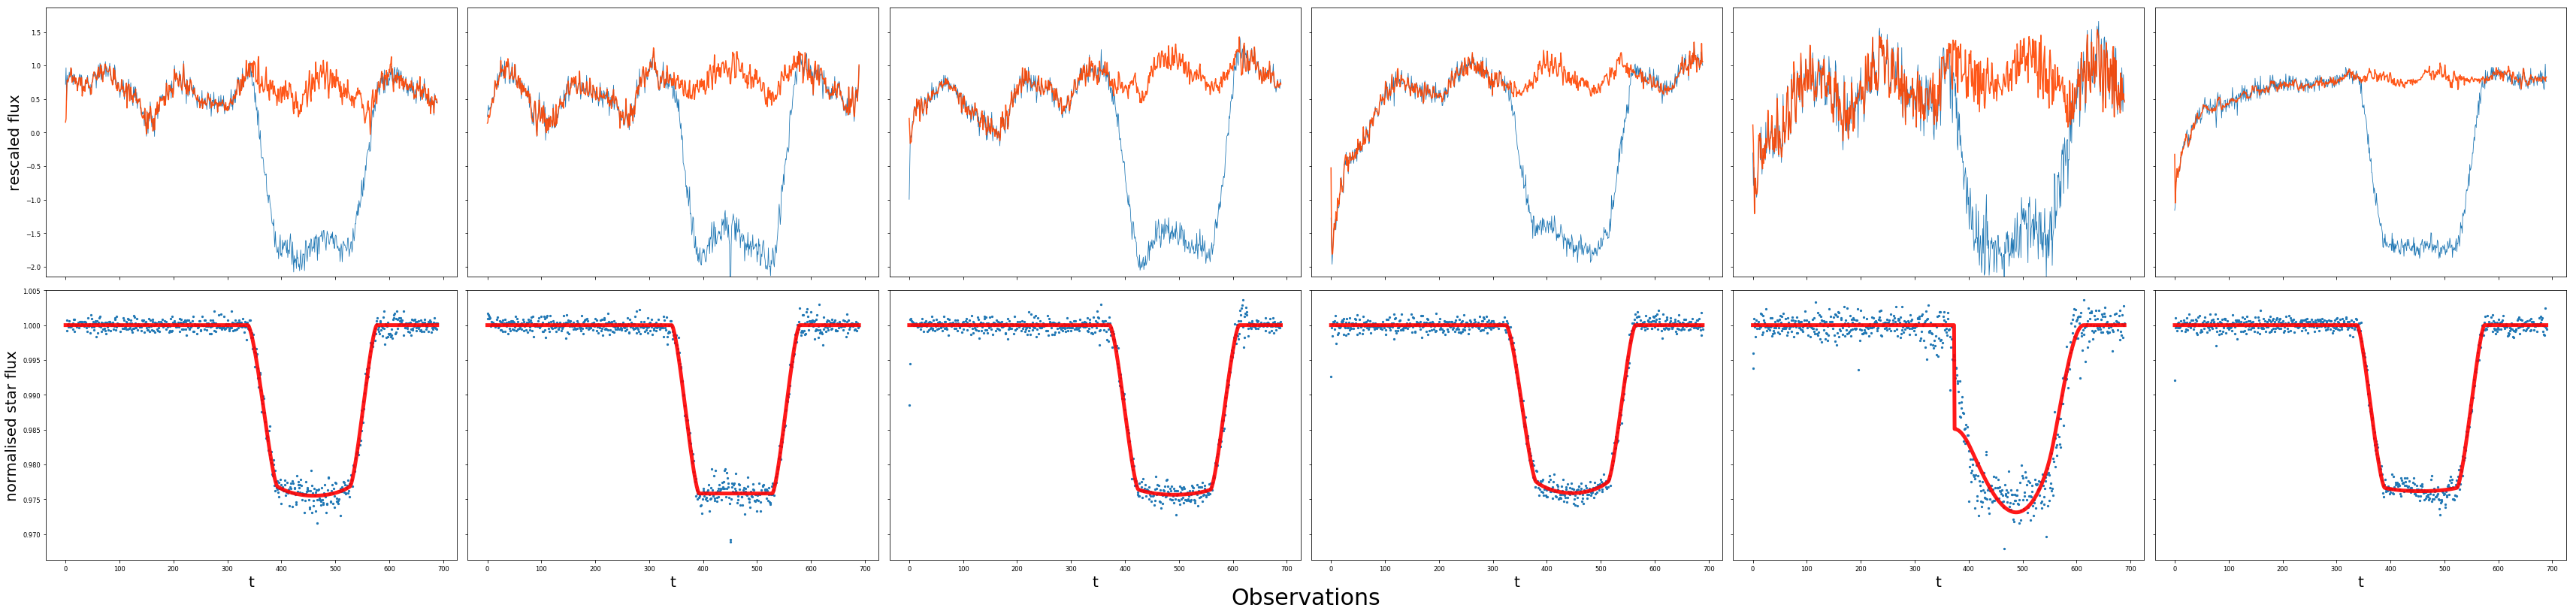

In [19]:
# all-transits in one plot
#step = 12000
#step = step_list[300//config.freq_eval]
step = step_list[-1]
verbose=True

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'
fig, ax = plt.subplots(2, data.Z.shape[0], figsize=(data.Z.shape[0]*8, 12), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0., wspace=0.)
if len(ax.shape) == 1:
    ax = ax[:,np.newaxis]
delta_list = []
tc_list = []

margin = 5

for obs in range(data.Z.shape[0]):
    loc_k = np.load(os.path.join(project_dir, config.output_dir, 'loc_array_{}.npy'.format(step))).swapaxes(0,1)
    scales_k = np.load(os.path.join(project_dir, config.output_dir, 'scales_array_{}.npy'.format(step))).swapaxes(0,1)[obs].flatten()
    transit = transitModel(data.time_array)


    transit_component = (data.scaler_Z.inverse_transform(data.Z)[obs]
                         /data.scaler_Z.inverse_transform(loc_k)[obs])
    min_P = transit.time_array[-1] - transit.time_array[0]
    transit.fit(transit_component, 
                range_fit=range(margin, data.Z.shape[1]-margin), 
                time_axis=0, 
                p0=transit.transit_pars,
                #sigma=scales_k[margin:data.Z.shape[1]-margin],
                sigma= ( #np.array(scales_k[margin:data.Z.shape[1]-margin]**2) + 
                        np.array([ transit_component.std()]*(data.Z.shape[1]-2*margin))),
                #bounds=((0., 0., min_P, np.diff(transit.time_array).mean(), 0., 0., 0., transit.time_array[0]),
                #        (0.2, 0.5, np.inf, min_P, 180., 1., 90., transit.time_array[-1]))
               )
    if verbose:
        print('transit params: {}'.format(transit.transit_pars))
        #print('uncertainties: {}'.format(np.sqrt(np.diag(transit.pcov))))
        print('transit depth:{0:0.6f} +/- {1:0.6f}'.format(transit.delta, transit.err_delta))

    ax[0, obs].plot(data.Z[obs].flatten(), label='data', linewidth=0.8)
    p = ax[0, obs].plot(loc_k[obs], color='orangered', label='pred', linewidth=1.5, alpha=0.9)

    ax[1, obs].scatter(transit.time_array, transit_component, s=5)
    ax[1, obs].plot(transit.flux, color='red', label='best fit', linewidth=5, alpha=0.9)
    tc_list.append(transit_component)
    ax[1,obs].set_xlabel('t')
    
    temp_pars = transit.transit_pars
    delta_list.append([transit.delta, transit.err_delta])
    delta_arr = np.array(delta_list)

ax[0,0].set_ylabel('rescaled flux')
ax[1,0].set_ylabel('normalised star flux')
ax[0,0].set_ylim(np.mean(data.Z.min(axis=(1,2))))#, np.mean(data.Z.max(axis=(1,2)
ax[1,0].set_ylim( np.min(1 - transit.delta)-0.01, 1.005)


fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.margins(x = 1)
plt.xlabel("Observations", fontsize=30, labelpad=20)
plt.subplots_adjust(bottom=0.5)
fig.show()

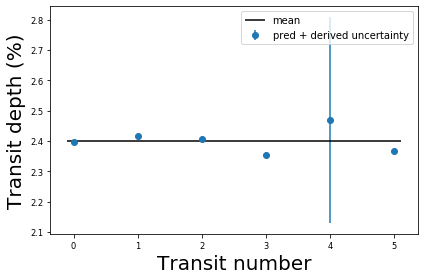

In [20]:

plt.errorbar(range(data.Z.shape[0]), delta_arr[:,0]*100, fmt='o', yerr=delta_arr[:,1]*100, label='pred + derived uncertainty')

#plt.hlines(0.015, 0,5, color='r', label='ground truth')
plt.hlines(np.mean(delta_arr[:,0])*100, -0.1, 5.1, label='mean')
plt.xlabel('Transit number', fontsize=20)
plt.ylabel('Transit depth (%)', rotation=90, fontsize=20)
plt.legend()
plt.show()
pass

## Traces

In [69]:
pred_array = np.load(os.path.join(project_dir, config.output_dir, 'pred_array.npy'))[:5]
pred_array.shape

(5, 6, 689, 1)

In [66]:
data.Z.shape

(6, 690, 1)

(6, 5)
transit depth:0.023865 +/- 0.000030
transit depth:0.023869 +/- 0.000033
transit depth:0.023870 +/- 0.000033
transit depth:0.023886 +/- 0.000029
transit depth:0.023908 +/- 0.000033


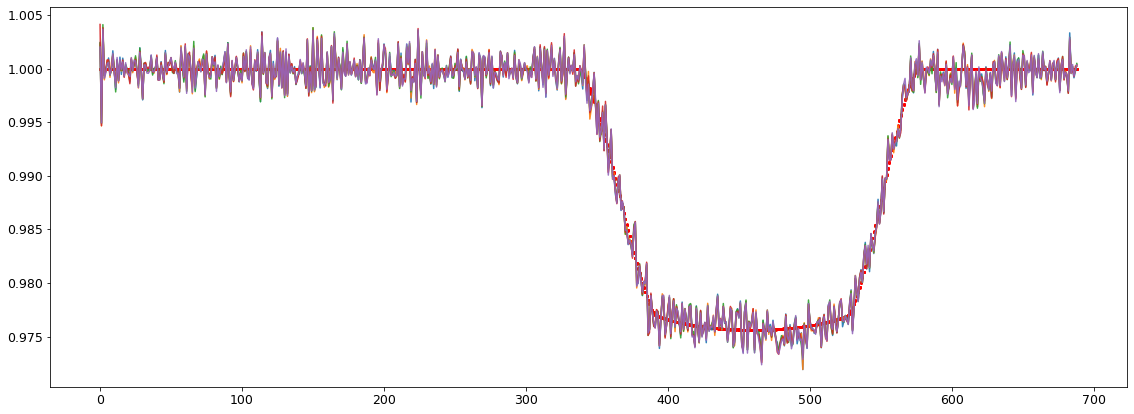

transit depth:0.023688 +/- 0.000016
transit depth:0.023671 +/- 0.000016
transit depth:0.023673 +/- 0.000014
transit depth:0.023737 +/- 0.000015
transit depth:0.023677 +/- 0.000014


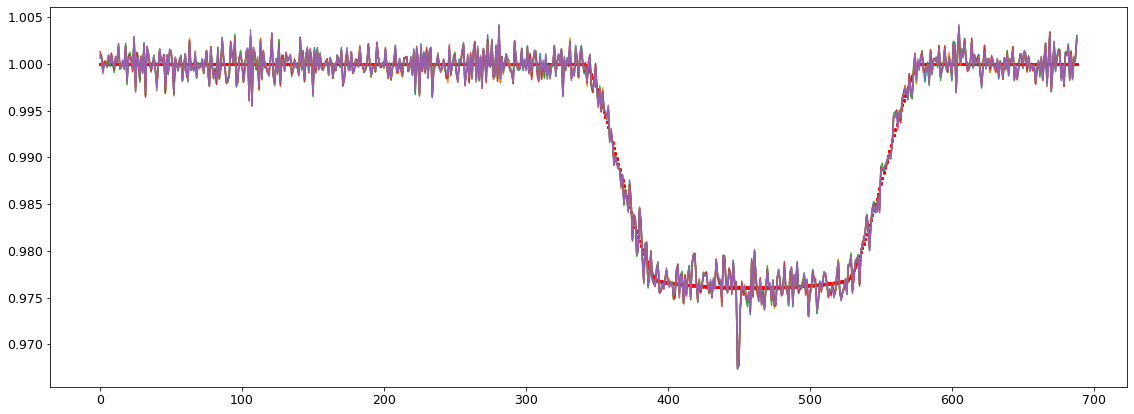

transit depth:0.023711 +/- 0.000020
transit depth:0.023763 +/- 0.000018
transit depth:0.023734 +/- 0.000019
transit depth:0.023732 +/- 0.000017
transit depth:0.023729 +/- 0.000020


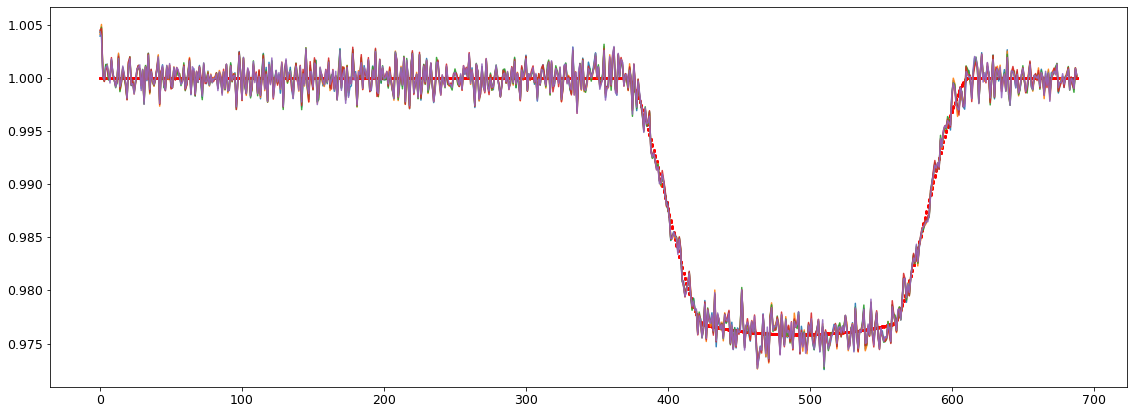

transit depth:0.024845 +/- 0.000025
transit depth:0.024807 +/- 0.000026
transit depth:0.024834 +/- 0.000025
transit depth:0.024836 +/- 0.000024
transit depth:0.024853 +/- 0.000025


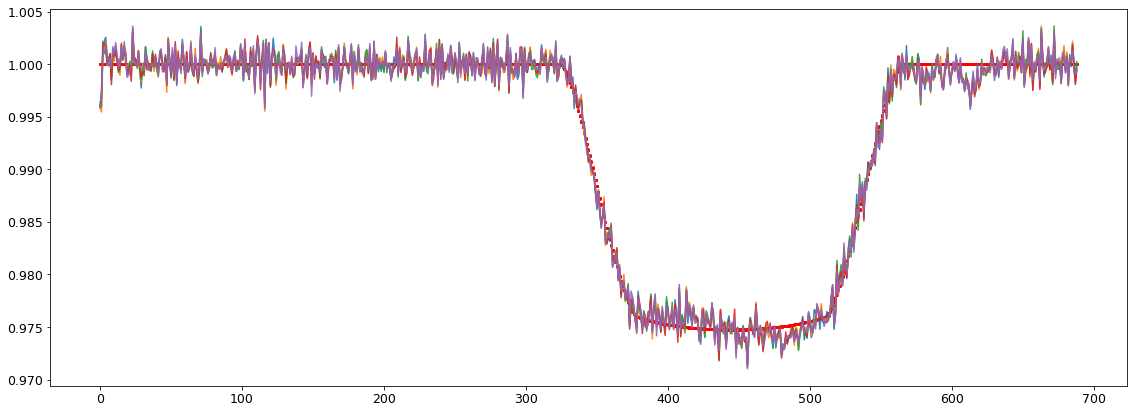

transit depth:0.024420 +/- 0.000026
transit depth:0.024394 +/- 0.000026
transit depth:0.024428 +/- 0.000027
transit depth:0.024524 +/- 0.000020
transit depth:0.024521 +/- 0.000023


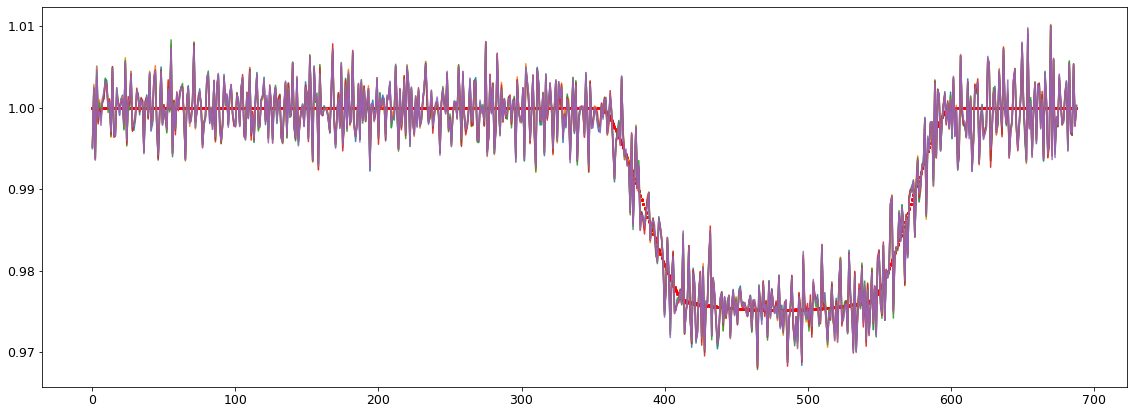

transit depth:0.024321 +/- 0.000009
transit depth:0.024300 +/- 0.000010
transit depth:0.024352 +/- 0.000009
transit depth:0.024318 +/- 0.000009
transit depth:0.024317 +/- 0.000009


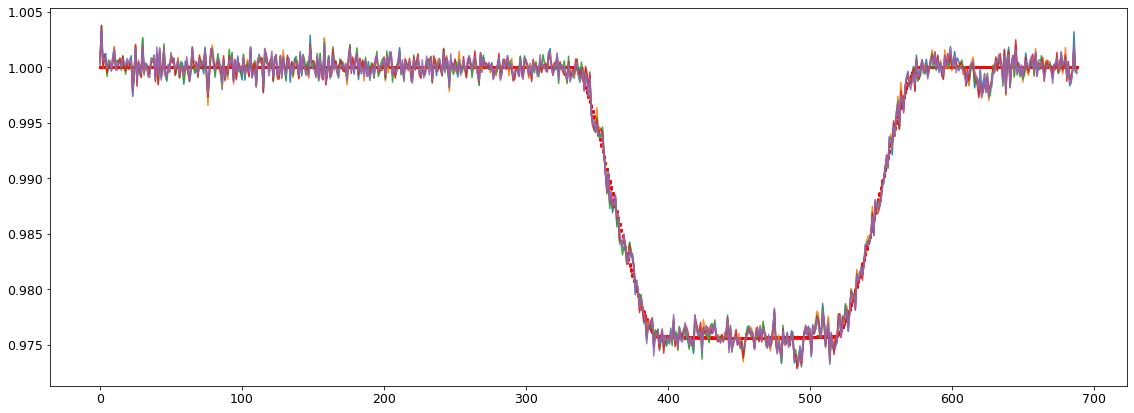

In [67]:
#step = step_list[-1]

delta_array = np.zeros(shape=(data.Z.shape[0], pred_array.shape[0]))
delta_err_array = np.zeros(shape=(data.Z.shape[0], pred_array.shape[0]))

N = pred_array.shape[0]
print(delta_array.shape)
for obs in range(data.Z.shape[0]):
    tc_traces = (data.scaler_Z.inverse_transform(data.Z)[obs,1:]
                 /data.scaler_Z.inverse_transform(pred_array)[:,obs])
    for trace in range(N):
        #loc_k = np.load(os.path.join(project_dir, config.output_dir, 'loc_array_{}.npy'.format(step))).swapaxes(0,1)
        #scales_k = np.load(os.path.join(project_dir, config.output_dir, 'scales_array_{}.npy'.format(step))).swapaxes(0,1)[obs].flatten()


        try:
            transit = transitModel(data.time_array)

            #transit_component = (data.scaler_Z.inverse_transform(data.Z)[obs]
            #                     /data.scaler_Z.inverse_transform(loc_k)[obs])
            #print(tc_traces.shape, scales_array.mean(), tc_traces.std(), transit_component.std())

            min_P = transit.time_array[-1] - transit.time_array[0]
            transit.fit(tc_traces[trace,margin:-margin], 
                        range_fit=range(1+margin, data.Z.shape[1]-margin), 
                        time_axis=0, 
                        p0=transit.transit_pars,
                        #sigma=scales_k[margin:data.Z.shape[1]-margin],
                        sigma= [tc_traces[trace].std()] * (data.Z.shape[1]-2*margin-1),
                        bounds=((0., 0., min_P, np.diff(transit.time_array).mean(), 0., 0., 0., transit.time_array[0]),
                                (0.2, 0.5, np.inf, min_P, 180., 1., 90., transit.time_array[-1])))
        except:
            print('problem', obs, trace)
            continue
        delta_array[obs,trace] = transit.delta
        delta_err_array[obs,trace] = transit.err_delta
        #transit.plot(color='red')
        plt.plot(tc_traces[trace], label='pred', linewidth=1.5, alpha=0.9)

        #print(transit_component.std())
        #print(np.abs((transit_component - transit.flux)).mean())

        plt.scatter(range(689), transit.flux[1:], s=3, color='red')
        #plt.errorbar(range(689), transit.flux[1:], np.abs(transit_component - transit.flux).mean())
        #plt.show()
        #print('transit params: {}'.format(transit.transit_pars))
        print('transit depth:{0:0.6f} +/- {1:0.6f}'.format(transit.delta, transit.err_delta))
    plt.show()

Text(0, 0.5, 'Transit depth (%)')

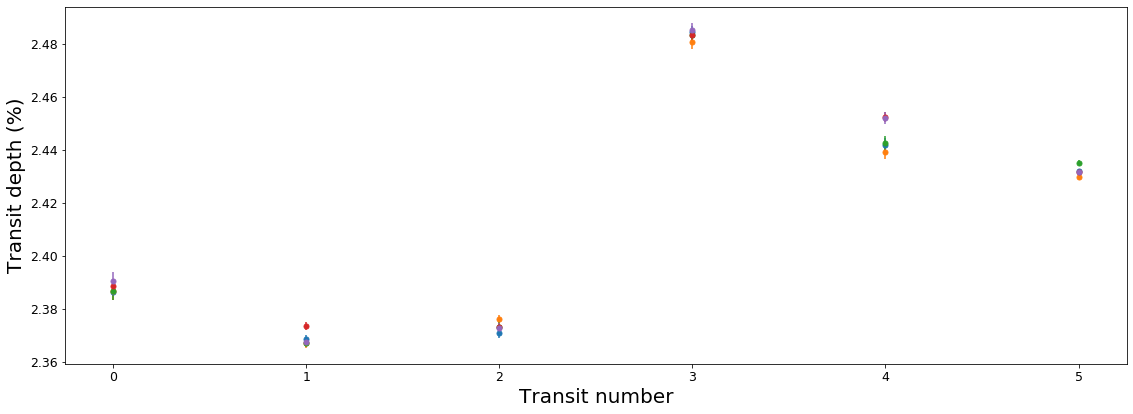

In [68]:
for trace in range(N):#pred_array.shape[0]):
    #plt.scatter(range(data.Z.shape[0]), delta_array[:,trace]*100, s= 2)

    plt.errorbar(range(data.Z.shape[0]), delta_array[:,trace]*100, 
                 markersize=5, fmt='o', yerr=delta_err_array[:,trace]*100, label='pred + derived uncertainty')

    #plt.hlines(0.015, 0,5, color='r', label='ground truth')
    
#plt.hlines(, -0.1, 5.1, label=' weighted mean')
plt.xlabel('Transit number', fontsize=20)
plt.ylabel('Transit depth (%)', rotation=90, fontsize=20)
#plt.legend()

In [37]:
simple_means = []
simple_errors = []
weighted_means = []
weighted_errors = []
for obs in range(data.Z.shape[0]):

    weights =  (1 / delta_err_array[obs,:N]) / sum(1/delta_err_array[obs,:N])
    print(weights.sum())
    simple_means.append(delta_array[obs,:N].mean())
    weighted_means.append( np.sum(weights * delta_array[obs,:N]))

    simple_errors.append(delta_array[obs,:N].std())
    
    weighted_errors.append(np.sqrt(sum(weights* (delta_array[obs,:N] - weighted_means[-1])**2 * N/(N-1))))

    print('simple transit depth:{0:0.6f} +/- {1:0.6f}'.format(simple_means[-1], simple_errors[-1]))
    print('better transit depth:{0:0.6f} +/- {1:0.6f}'.format(weighted_means[-1], weighted_errors[-1]))

1.0
simple transit depth:0.023687 +/- 0.000036
better transit depth:0.023697 +/- 0.000040
1.0
simple transit depth:0.023736 +/- 0.000054
better transit depth:0.023742 +/- 0.000056
1.0000000000000002
simple transit depth:0.023826 +/- 0.000031
better transit depth:0.023826 +/- 0.000035
0.9999999999999998
simple transit depth:0.023678 +/- 0.000031
better transit depth:0.023679 +/- 0.000035
0.9999999999999999
simple transit depth:0.023625 +/- 0.000048
better transit depth:0.023625 +/- 0.000054
1.0
simple transit depth:0.023690 +/- 0.000039
better transit depth:0.023690 +/- 0.000043


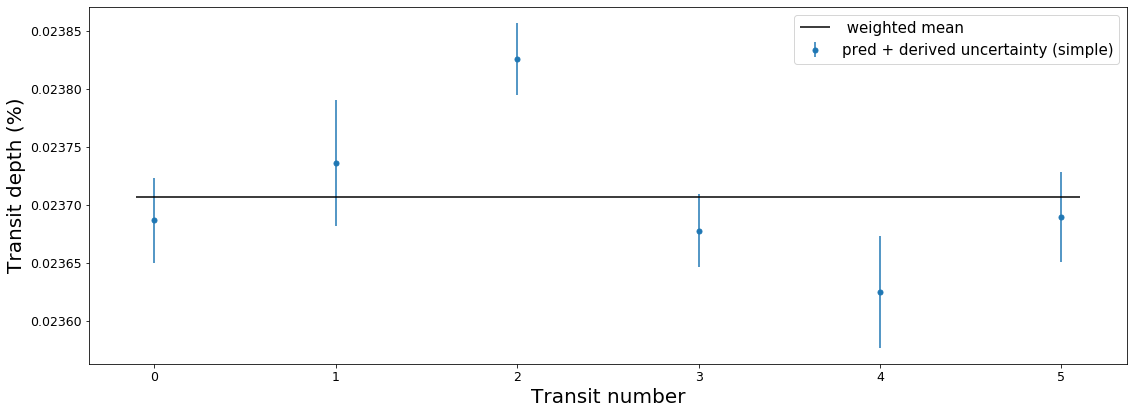

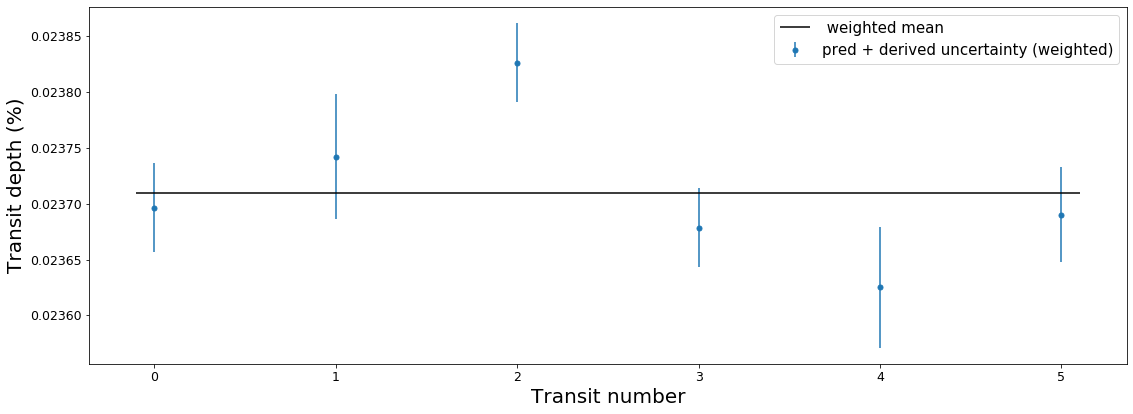

In [38]:

plt.errorbar(range(data.Z.shape[0]), simple_means, 
             markersize=5, fmt='o', yerr=simple_errors, label='pred + derived uncertainty (simple)')
plt.hlines(np.mean(simple_means), -0.1, 5.1, label=' weighted mean')

plt.xlabel('Transit number', fontsize=20)
plt.ylabel('Transit depth (%)', rotation=90, fontsize=20)
plt.legend()
plt.show()
plt.errorbar(range(data.Z.shape[0]), weighted_means, 
             markersize=5, fmt='o', yerr=weighted_errors, label='pred + derived uncertainty (weighted)')
plt.hlines(np.mean(weighted_means), -0.1, 5.1, label=' weighted mean')
plt.xlabel('Transit number', fontsize=20)
plt.ylabel('Transit depth (%)', rotation=90, fontsize=20)
plt.legend()
plt.show()


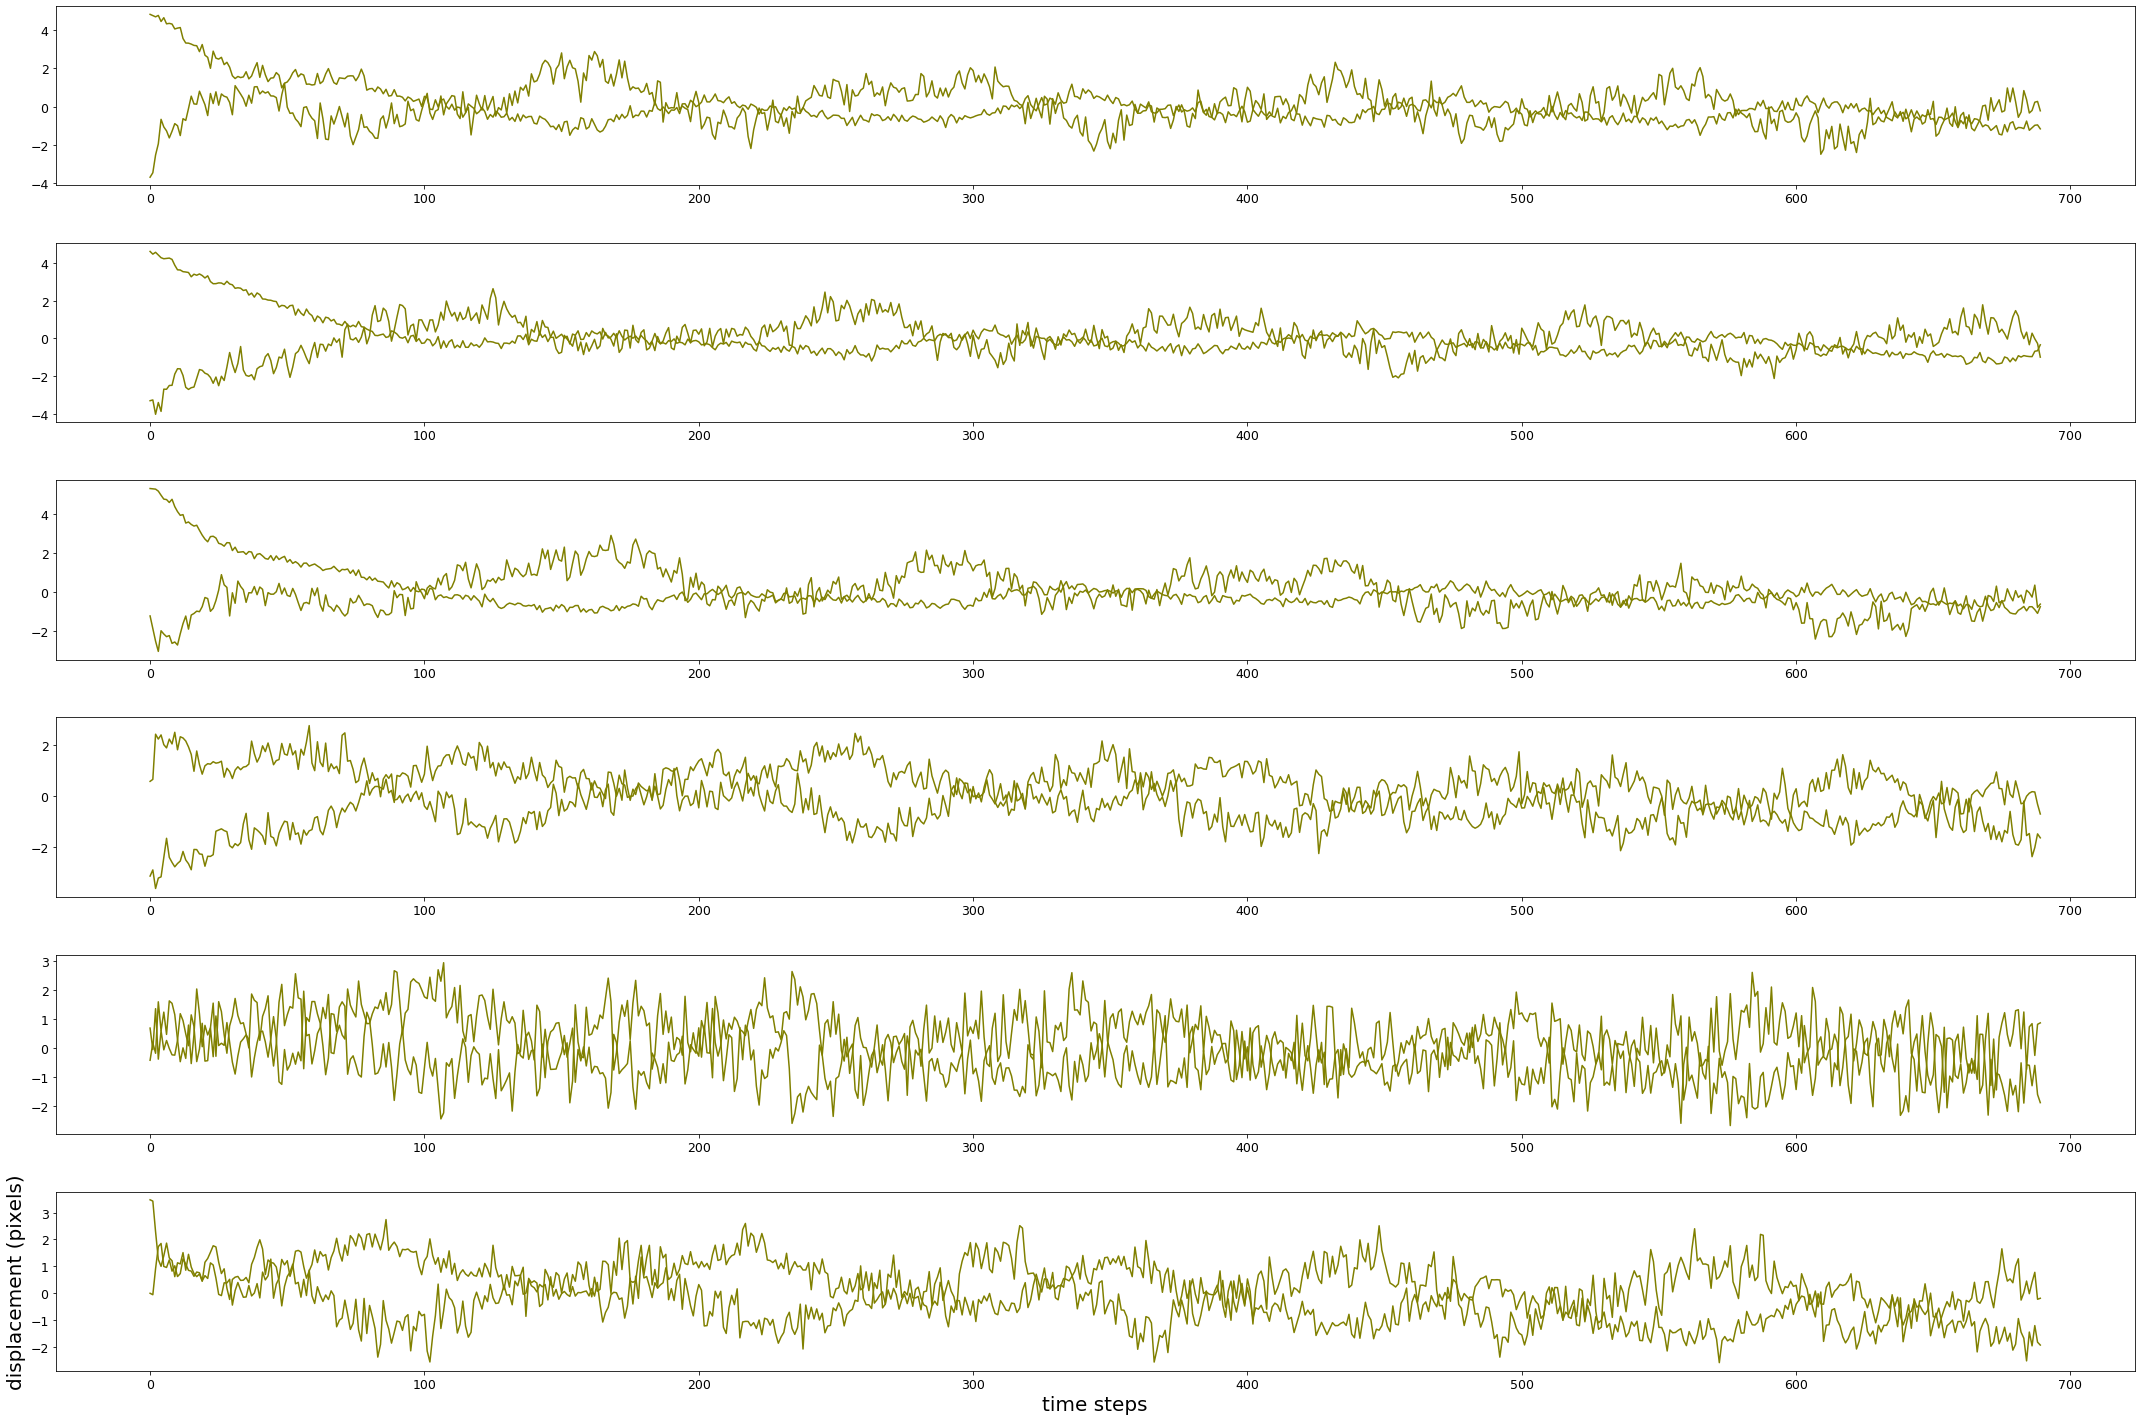

In [155]:
f, ax = plt.subplots(6, figsize=(30,20))
for i, lc in enumerate(data.Z):
    #plt.figure(figsize=(15,4))
    #ax[i].plot(data.time_array, lc)
    ax[i].plot(data.time_array, data.X[i], color='olive')
    plt.ylabel('displacement (pixels)')
    plt.xlabel('time steps')
    #plt.show()
#plt.subplots_adjust(hspace=0.1)
#plt.show()